In [ ]:
import pandas as pd
import numpy as np

df=pd.read_csv('house_data_train.csv', index_col = 0)
df = df.dropna()
df1 = df.head(15000)

### Split Data

In [ ]:
from numpy.lib import polynomial
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

from sklearn.model_selection import train_test_split

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PolynomialFeatures

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

import seaborn as sns

X = df1['sqft_living'].values.reshape(-1,1)
y = df1['price'].values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, shuffle=False)

kfold = KFold(n_splits = 10, shuffle = True, random_state = 100)

lr = LinearRegression()

cv_scores = cross_val_score(lr, X_train, y_train, cv = kfold)

### Linear Regression

In [ ]:
# import random
# # import math

# # import pandas as pd
# # import numpy as np

# def initialize(dim):
#     b=random.random()
#     a=np.random.rand(dim)
#     return b,a

# def predict_Y(b,a,X):
#     return b + np.dot(X,a)

# def get_cost(Y,Y_hat):
#     Y_resd=Y-Y_hat
#     return np.sum(np.dot(Y_resd.T,Y_resd))/len(Y-Y_resd)

# def update_theta(x,y,y_hat,b_0,theta_o,learning_rate):
#     db=(np.sum(y_hat-y)*2)/len(y)
#     dw=(np.dot((y_hat-y),x)*2)/len(y)
#     b_1=b_0-learning_rate*db
#     theta_1=theta_o-learning_rate*dw
#     return b_1,theta_1

# def run_gradient_descent(X,Y,alpha,num_iterations):
#     tolerance = 1e-8
#     b,theta=initialize(X.shape[1])
#     num_weight = len('sqft_living')
#     weights = [f'weights_a{i}' for i in range(num_weight)]
#     gd_iterations_df=pd.DataFrame(columns=['iteration','value_b', *weights, 'cost'])
#     result_idx=0
#     prev_cost = 0
#     for iter_num in range(num_iterations):
#         Y_hat=predict_Y(b,theta,X)
#         this_cost=get_cost(Y,Y_hat)
#         prev_b=b
#         prev_theta=theta
#         b,theta=update_theta(X,Y,Y_hat,prev_b,prev_theta,alpha)
#         gd_iterations_df.loc[result_idx]=[iter_num,b, *theta[:num_weight] , this_cost]
#         result_idx=result_idx+1   
#         if (np.abs(this_cost - prev_cost)<tolerance):
#           print(np.abs(this_cost - prev_cost))
#           break
#         prev_cost = this_cost
#     return gd_iterations_df,b,theta
        
# gd_iterations_df,b,theta=run_gradient_descent(X,y,alpha=0.01,num_iterations=1000)
# #gd_iterations_df.head(5)
# gd_iterations_df

###Pipeline_Linear Regression

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline

for i in range(1,20):

  steps = [("imp_mean", SimpleImputer()), 
           ("scaler", StandardScaler()),
           ("transform", PolynomialFeatures(degree = i)),
           ("liReg", LinearRegression())]

  pipeline = Pipeline(steps)
  
  pipeline.fit(X_train, y_train)

  rscore_test = pipeline.score(X_test, y_test)
  rscore_train = pipeline.score(X_train, y_train)

  y_pred = pipeline.predict(X_test)

  print(i, "test: ", rscore_test, "train: ", rscore_train)

1 test:  0.5120760466376741 train:  0.4869329578578002
2 test:  0.603690516166391 train:  0.5345402684747389
3 test:  0.6039636817090663 train:  0.5345494669644933
4 test:  0.592332942422171 train:  0.5357647599809185
5 test:  0.3102347431635679 train:  0.5395923677958909
6 test:  0.3405835214423504 train:  0.5395950517604571
7 test:  0.31114445740491214 train:  0.5395953481063513
8 test:  -5.7702059086529855 train:  0.5397562371829467
9 test:  -224.2356496216139 train:  0.5404616488420089
10 test:  -1193.5509341071709 train:  0.5406348326575674
11 test:  -1073.6533275127547 train:  0.5407976763802123
12 test:  -27179.618683148838 train:  0.5408997467470734
13 test:  -10724449.298804343 train:  0.5426525194803484
14 test:  -251689141.7617726 train:  0.5444506537609398
15 test:  -2091749442.7149615 train:  0.5451271781812381
16 test:  -9279335336.854696 train:  0.5452586844937665
17 test:  -9571655047.87511 train:  0.5450868444603723
18 test:  -431504785003.5421 train:  0.54289905283530

###Print cv_scores for Linear Regression

In [ ]:
print(cv_scores)

[0.49192709 0.48496681 0.4817647  0.44957235 0.49459868 0.48072631
 0.51472523 0.47630307 0.48177975 0.49461894]


### r2score_Linear Rregression

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

normalize = MinMaxScaler()
X_scaled = normalize.fit_transform(X)

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_scaled, y)
print(lr.coef_, lr.intercept_, "\n")

y_pred = lr.predict(X_scaled)
rscore = r2_score(y, y_pred)
mse = mean_squared_error(y, y_pred)
mae = mean_absolute_error(y, y_pred)

print('r2-score:', rscore, '\nmean squared error:', mse, '\nmean absolute error:', mae)

[[3363685.95159992]] [49431.20170909] 

r2-score: 0.49762406833852624 
mean squared error: 71332882243.79005 
mean absolute error: 176205.98724291366


### Visualization for Linear Regression model

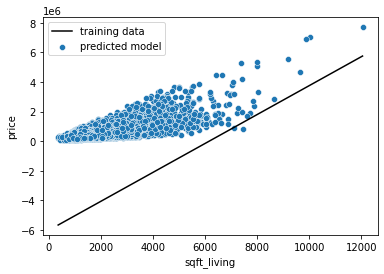

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

sns.scatterplot(data = df1, x = 'sqft_living', y = 'price')
x_model = np.linspace(df1['sqft_living'].min(), df1['sqft_living'].max(), 50)
y_model = lr.predict(sklearn.preprocessing.StandardScaler().fit_transform(x_model.reshape(-1,1)))

# y_model = lr.predict(scaler.fit_transform(x_model.reshape(-1,1)))
# X = sklearn.preprocessing.StandardScaler().fit_transform(X)

plt.plot(x_model,  y_model, color = 'k')
plt.legend(['training data', 'predicted model'])
plt.show()

### Polynomial regression :
1) Feature scaling and Transform poly features 
2) model using a linear regression. 
3) Predict using the Model 

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

#Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X.reshape(-1,1))

# Poly transformation
order = 15
poly = PolynomialFeatures(degree=order, include_bias = False)
poly_features = poly.fit_transform(X_scaled.reshape(-1, 1))

# Modeling. 
lr = LinearRegression()
model = lr.fit(poly_features, y)
print(model.coef_, model.intercept_)

#Prediction
Y_pred = model.predict(poly_features)
rscore = model.score(poly_features, y)
mse = mean_squared_error(y, Y_pred)
mae = mean_absolute_error(y, Y_pred)

print('r2-score:', rscore.round(2), '\nmean squared error:', mse.round(2), '\nmean absolute error:', mae.round(2))
print("")
print("actual Price:",y[0], "Predict Price:",Y_pred[0], "Differece:", y[0]-Y_pred[0])

[[ 1.94957184e+05  8.90350993e+04 -2.06052532e+04 -4.79100168e+04
   3.12227477e+04  1.19194656e+04 -1.19292638e+04  1.15762445e+03
   1.24987435e+03 -5.22477056e+02  9.53816049e+01 -9.50541165e+00
   5.14424927e-01 -1.28929215e-02  7.62588752e-05]] [490746.55291925]
r2-score: 0.57 
mean squared error: 61577100114.73 
mean absolute error: 166039.7

actual Price: [350000.] Predict Price: [528970.98487099] Differece: [-178970.98487099]


###Ridge Regression

In [ ]:
pr=PolynomialFeatures(degree = i)

X_train_pr = pr.fit_transform(X_train)
X_test_pr = pr.fit_transform(X_test)

ridgeReg = Ridge(alpha=0.001, normalize=True)
ridgeReg.fit(X_train_pr, y_train)

Ypred_train = ridgeReg.predict(X_train_pr)
Ypred_test = ridgeReg.predict(X_test_pr)

ridgeReg.score(X_train_pr, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(


0.5388534047119149

###Lasso Regression

In [41]:
pr=PolynomialFeatures(degree = 3)
X_train_pr = pr.fit_transform(X_train)
X_test_pr = pr.fit_transform(X_test)

lassoReg = Lasso(alpha=0.01, max_iter=20000, normalize=True)
lassoReg.fit(X_train_pr, y_train)

Ypred_train = lassoReg.predict(X_train_pr)
Ypred_test = lassoReg.predict(X_test_pr)

lassoReg.score(X_train_pr, y_train)

print("actual Price:",y[0], "Predict Price:",Ypred_train[0], "Differece:", y[0]-Ypred_train[0])

actual Price: 350000.0 Predict Price: 537900.3137392905 Differece: -187900.31373929046


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


###cv_score for Ridge and Lasso Regression

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression

kfold = KFold(n_splits= 10, shuffle=True, random_state=100)

# lr = LinearRegression()

steps = [("imp_mean", SimpleImputer()),
          ("scaler" , StandardScaler()),
          ("tranform" , PolynomialFeatures(degree = i)),
          # ("rReg" , Ridge(alpha=0, normalize=True)),
          ("lRag", Lasso(alpha=100, max_iter=20000, normalize=True))
          ]
          
# r=Ridge(alpha=100, normalize=True)
# l=Lasso(alpha=100, max_iter=20000, normalize=True)

pipeline = Pipeline(steps)

cv_scores = cross_val_score(pipeline, X_train, y_train, cv=kfold)

print(cv_scores)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from skle

[0.52960694 0.51834565 0.59814104 0.49671377 0.52536056 0.49239117
 0.58936069 0.50695351 0.48863771 0.53799843]


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


### Visualization for Poly regression

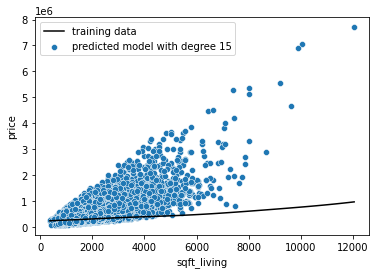

In [ ]:
sns.scatterplot(data = df1, x = 'sqft_living', y = 'price')
x_model = np.linspace(df1['sqft_living'].min(), df1['sqft_living'].max(), 50)
x_model_scaled = scaler.fit_transform(x_model.reshape(-1,1))

x_model_poly  = poly.fit_transform(x_model_scaled)
y_model = model.predict(x_model_poly)

plt.plot(x_model,  y_model, color = 'k')
plt.legend(['training data', 'predicted model with degree ' + str(order)])
plt.show()

### Saving Best Model for Deployment

import joblib
X = df1['sqft_living'].values
y = df1['price'].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X.reshape(-1,1))

poly = PolynomialFeatures(degree=best_order, include_bias=False)
poly_features = poly.fit_transform(X_scaled.reshape(-1, 1))
    
lr = LinearRegression()
model = lr.fit(poly_features, y)

joblib.dump(model,'best_model.pkl')

Y_pred = model.predict(poly_features)
rscore = model.score(poly_features, y)
mse = mean_squared_error(y, Y_pred)
mae = mean_absolute_error(y, Y_pred)

In [ ]:
import joblib 
X = df1['sqft_living'].values 
y = df1['price'].values

scaler = StandardScaler() 
X_scaled = scaler.fit_transform(X.reshape(-1,1))

# poly = PolynomialFeatures(degree=6, include_bias=False) 
# poly_features = poly.fit_transform(X_scaled.reshape(-1, 1))

# lr = LinearRegression() 
# model = lr.fit(poly_features, y)

pr=PolynomialFeatures(degree = 3)
X_train_pr = pr.fit_transform(X_train)
X_test_pr = pr.fit_transform(X_test)

lassoReg = Lasso(alpha=0.01, max_iter=20000, normalize=True)
lassoReg.fit(X_train_pr, y_train)

joblib.dump(model,'best_model.pkl')

Y_pred = model.predict(poly_features) 
rscore = model.score(poly_features, y) 
mse = mean_squared_error(y, Y_pred) 
mae = mean_absolute_error(y, Y_pred)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.774e+14, tolerance: 1.